# Code for training the ML model

Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

Load the dataset

In [2]:
data = pd.read_csv('improved_synthetic_dataset.csv',encoding='ISO-8859-1')

In [3]:
data.sample(5)

,Vehicle ID,Speed (km/h),Acceleration (m/s²),Braking intensity (%),Cornering speed (km/h),Battery SoC (%),Battery current (A),Battery temperature (°C),Motor speed (rpm),Motor torque (Nm),...,Distance traveled (km),Altitude (m),Heading (°),Throttle position (%),Regen braking state,Trip distance (km),Trip time (min),Ambient temperature (°C),Motor fault codes,Driver Behavior rating
5174,EV007,50,2.235957,78,25,74,-5.796103,62,3006,75,...,66.210892,239,184,75,On,35.758440,42.068753,25.478673,0,1
3532,EV010,120,5.862294,51,23,89,-8.086836,74,2320,68,...,52.028388,194,183,48,On,34.127669,16.922811,24.853938,0,8
5599,EV005,67,4.547935,79,20,89,-8.029750,59,2927,75,...,80.015753,154,181,57,Off,5.745432,5.069499,25.171290,0,4
3132,EV018,94,5.232485,82,24,76,-7.863915,37,2661,79,...,38.355116,207,180,69,On,19.256486,12.161991,27.245380,0,8
4186,EV007,96,4.386800,59,30,77,-8.015597,75,3112,69,...,117.229305,230,180,62,Off,60.837636,37.631527,25.267813,103,1


### Preprocessing

In [4]:
data['Motor fault codes'].unique()

array([  0, 102, 103, 101, 104], dtype=int64)

In [5]:
data['Regen braking state'].sample(5)

4450     On
75       On
9914    Off
7507     On
5979    Off
Name: Regen braking state, dtype: object

In [6]:
data['Regen braking state'] = data['Regen braking state'].replace({'On': 1, 'Off': 0})
data['Regen braking state'].sample(5)

6370    1
410     1
7699    1
139     1
4304    0
Name: Regen braking state, dtype: int64

Convert Driver ID to categorical variables

In [7]:
# data['Vehicle ID'] = data['Vehicle ID'].apply(lambda x: int(x[2:]))

In [8]:
label_encoder = LabelEncoder()
data['Vehicle ID'] = label_encoder.fit_transform(data['Vehicle ID'])

In [9]:
original_labels = label_encoder.classes_
encoded_labels = label_encoder.transform(original_labels)

label_mapping = pd.DataFrame({
    'Original Label': original_labels,
    'Encoded Label': encoded_labels
})

print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
   Original Label  Encoded Label
0           EV001              0
1           EV002              1
2           EV003              2
3           EV004              3
4           EV005              4
5           EV006              5
6           EV007              6
7           EV008              7
8           EV009              8
9           EV010              9
10          EV011             10
11          EV012             11
12          EV013             12
13          EV014             13
14          EV015             14
15          EV016             15
16          EV017             16
17          EV018             17
18          EV019             18


In [10]:
data.sample(10)

,Vehicle ID,Speed (km/h),Acceleration (m/s²),Braking intensity (%),Cornering speed (km/h),Battery SoC (%),Battery current (A),Battery temperature (°C),Motor speed (rpm),Motor torque (Nm),...,Distance traveled (km),Altitude (m),Heading (°),Throttle position (%),Regen braking state,Trip distance (km),Trip time (min),Ambient temperature (°C),Motor fault codes,Driver Behavior rating
7456,12,87,5.568903,83,26,86,-8.133509,61,2636,78,...,92.190517,166,181,83,0,83.278580,56.780850,27.239801,0,3
6463,18,51,2.092428,72,24,92,-5.545703,65,2911,62,...,66.447235,191,181,77,1,24.436479,28.195937,29.691103,0,3
6703,7,57,4.714532,89,26,72,-5.805906,35,2772,80,...,117.185218,155,175,65,1,15.938103,16.487693,25.463783,0,2
3821,6,99,8.017083,54,24,81,-8.711457,51,2279,64,...,72.040271,166,171,43,0,30.938089,18.562854,29.993303,0,10
6694,10,76,4.524363,60,22,83,-7.533633,47,2440,82,...,76.640359,225,171,49,0,65.787940,51.263330,22.420587,0,8
1071,7,99,2.200679,65,32,89,-7.659702,40,2913,74,...,82.569438,180,180,59,0,40.871853,24.523112,29.797266,0,4
5378,9,115,7.852838,79,30,85,-7.792499,60,2599,63,...,142.208882,182,189,69,1,88.845433,45.954534,24.116937,0,8
7544,8,96,5.588453,52,23,83,-7.810011,34,2887,70,...,43.149372,195,188,64,0,5.127067,3.171382,29.741332,0,4
2052,17,61,3.223960,74,20,97,-8.505457,44,2967,74,...,106.813670,244,172,84,0,8.325736,8.057164,29.582750,0,1
7253,7,82,2.919937,65,26,89,-6.645948,76,2616,82,...,104.439886,235,176,65,1,0.280478,0.202755,26.701318,0,5


In [11]:
data.describe()

,Vehicle ID,Speed (km/h),Acceleration (m/s²),Braking intensity (%),Cornering speed (km/h),Battery SoC (%),Battery current (A),Battery temperature (°C),Motor speed (rpm),Motor torque (Nm),...,Distance traveled (km),Altitude (m),Heading (°),Throttle position (%),Regen braking state,Trip distance (km),Trip time (min),Ambient temperature (°C),Motor fault codes,Driver Behavior rating
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.999200,86.580600,5.239498,68.965600,27.47980,79.600900,-6.980044,54.972800,2677.65220,79.936300,...,91.099013,200.501900,180.063100,63.968800,0.497000,44.773878,32.228878,25.983981,4.034100,5.491000
std,5.444609,19.597079,2.042371,13.258688,5.68361,9.380577,1.163723,14.666744,204.51163,11.827165,...,40.955576,29.091147,6.075608,10.526391,0.500016,35.087182,26.892302,2.298019,19.921296,2.876238
min,0.000000,43.000000,0.500901,40.000000,15.00000,60.000000,-8.999961,30.000000,2200.00000,60.000000,...,12.026708,150.000000,170.000000,40.000000,0.000000,0.001541,0.001217,22.000519,0.000000,1.000000
25%,4.000000,71.000000,3.783297,59.000000,23.00000,72.000000,-8.003288,42.000000,2530.00000,70.000000,...,55.973686,175.000000,175.000000,56.000000,0.000000,16.132028,11.320152,24.003449,0.000000,3.000000
50%,9.000000,86.000000,5.256975,69.000000,28.00000,79.500000,-6.968275,55.000000,2676.00000,80.000000,...,91.263873,201.000000,180.000000,64.000000,0.000000,36.042798,25.067734,25.958675,0.000000,5.000000
75%,14.000000,102.000000,6.676807,79.000000,32.00000,87.000000,-5.964651,68.000000,2824.00000,90.000000,...,126.248219,226.000000,185.000000,72.000000,1.000000,66.057775,46.903840,27.982438,0.000000,8.000000
max,18.000000,130.000000,9.995841,98.000000,40.00000,99.000000,-5.000190,80.000000,3150.00000,100.000000,...,169.745315,250.000000,190.000000,88.000000,1.000000,163.591568,166.012499,29.999882,104.000000,10.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

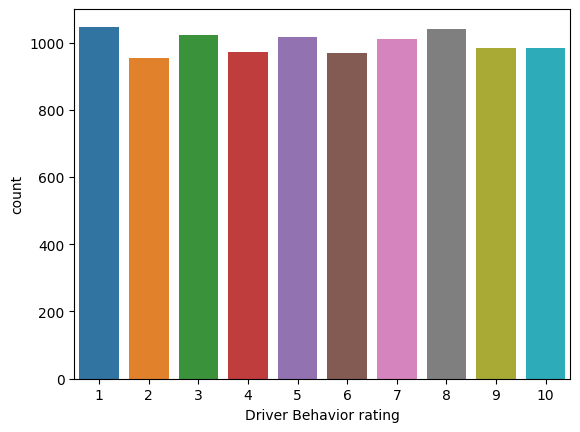

In [13]:
sns.countplot(x='Driver Behavior rating', data=data)
plt.show()

Computing Correlation Matrix

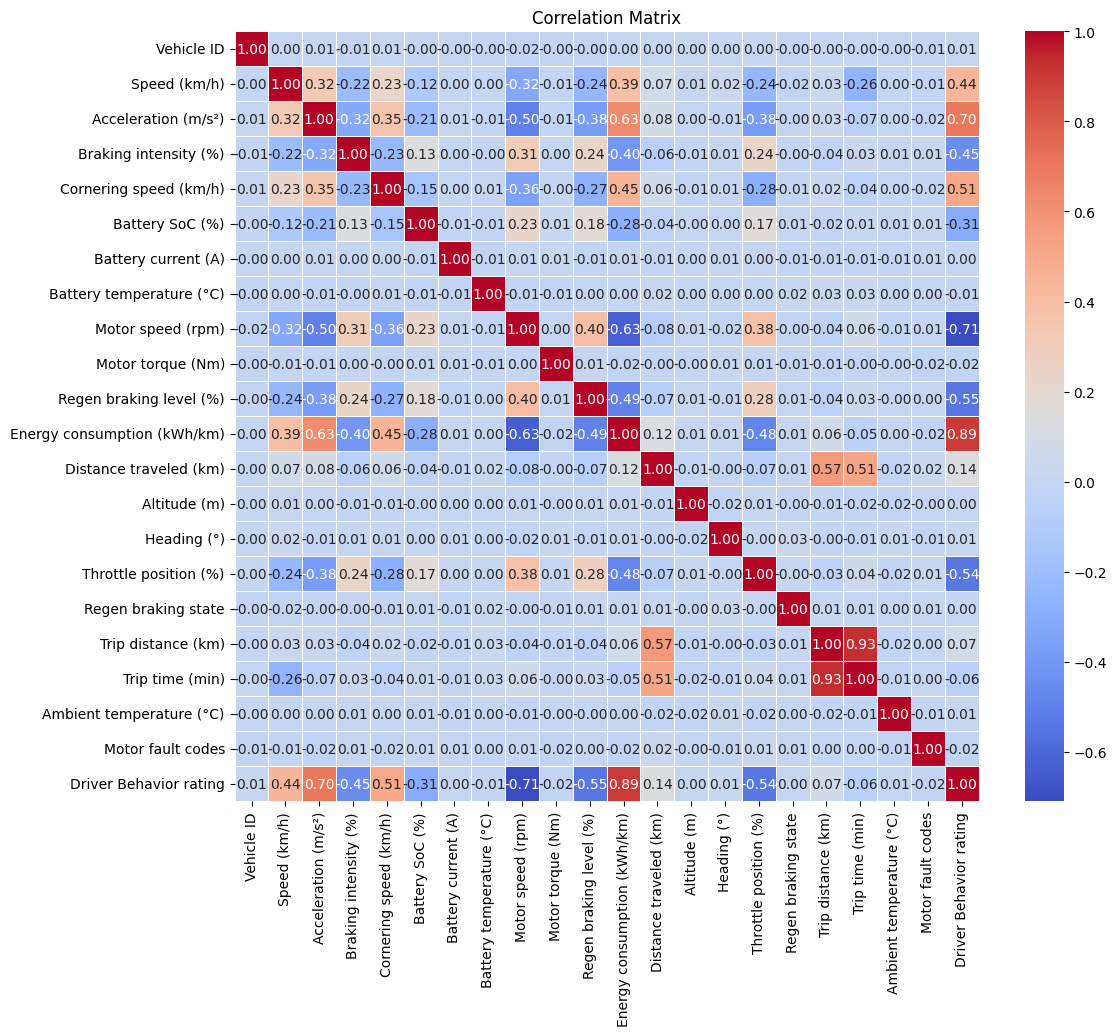

In [14]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

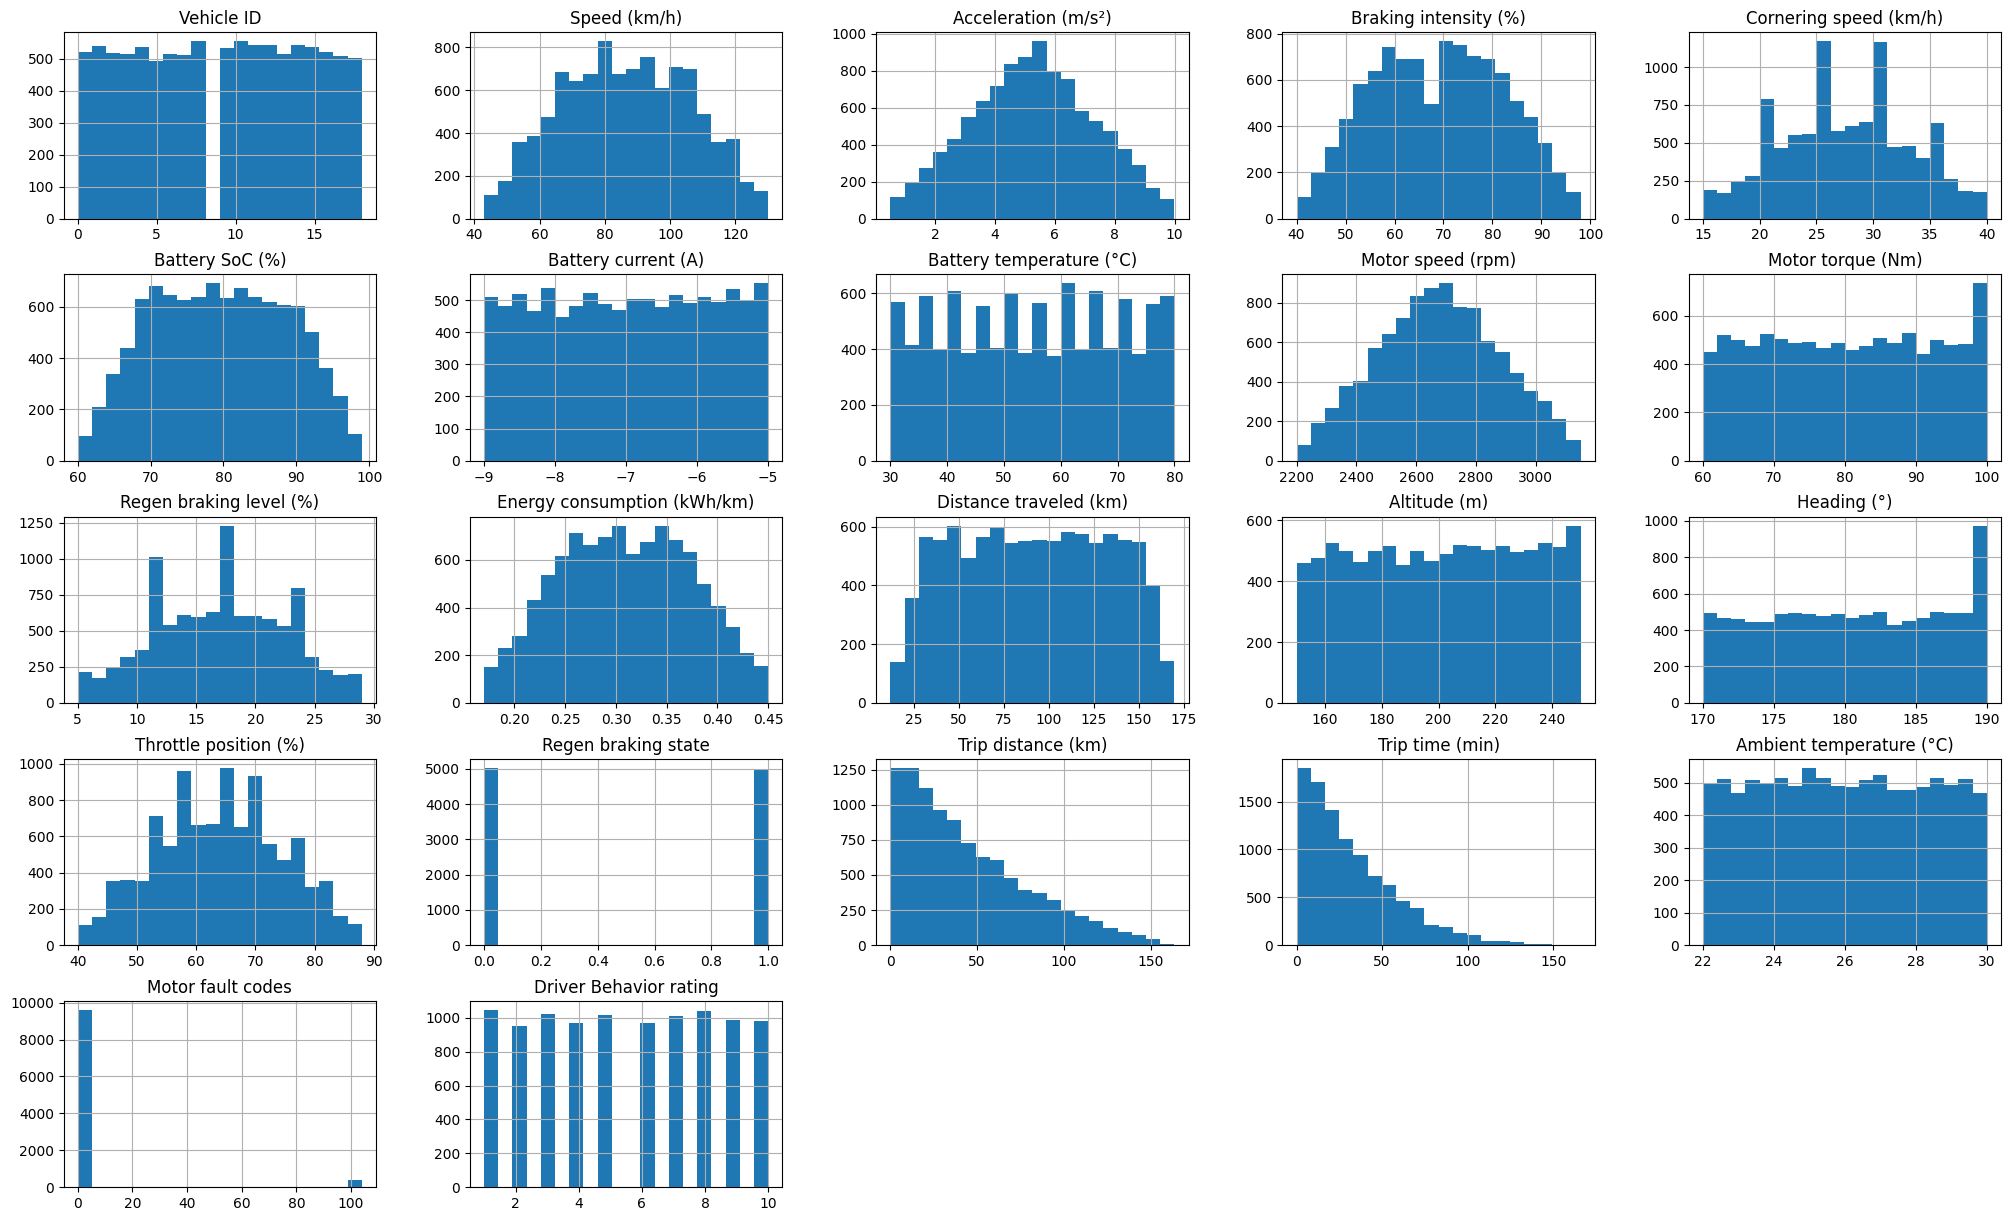

In [15]:
data.hist(bins=20, figsize=(25, 15))
plt.show()

Violin plot for numerical variables against a categorical variable

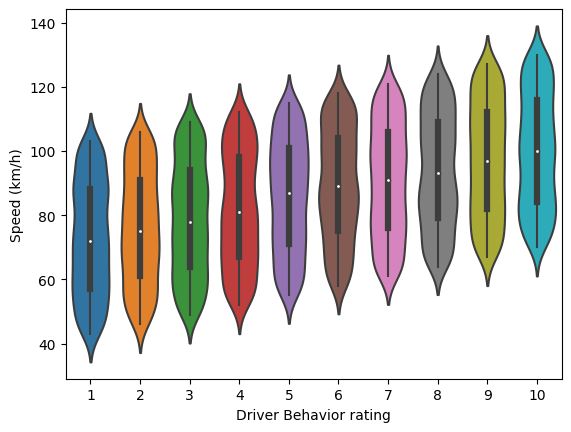

In [16]:
sns.violinplot(x='Driver Behavior rating', y='Speed (km/h)', data=data)
plt.show()

## Data Preparation

In [17]:
from sklearn.model_selection import train_test_split
 
X = data.drop(['Driver Behavior rating'], axis=1)  
y = data['Driver Behavior rating']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
train_count = X_train.shape[0]
test_count = X_test.shape[0]

print("Number of samples in the train set:", train_count)
print("Number of samples in the test set:", test_count)

Number of samples in the train set: 8000
Number of samples in the test set: 2000


## Model Training

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Model 1: Random Forest Classifier

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classifier Accuracy: 0.5415
Random Forest Classifier Report:
              precision    recall  f1-score   support

           1       0.70      0.78      0.74       215
           2       0.45      0.46      0.46       179
           3       0.50      0.49      0.50       215
           4       0.53      0.43      0.47       214
           5       0.44      0.54      0.48       194
           6       0.49      0.41      0.45       198
           7       0.51      0.46      0.48       200
           8       0.51      0.53      0.52       211
           9       0.50      0.57      0.53       177
          10       0.77      0.73      0.75       197

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



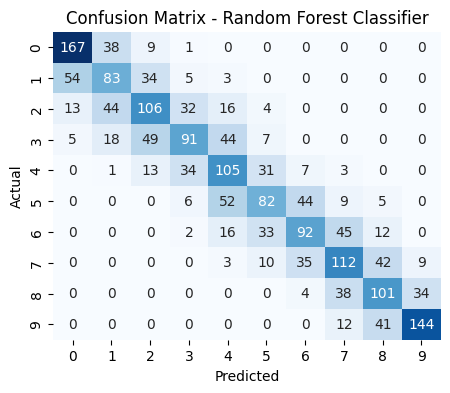

In [21]:
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Plot feature importances

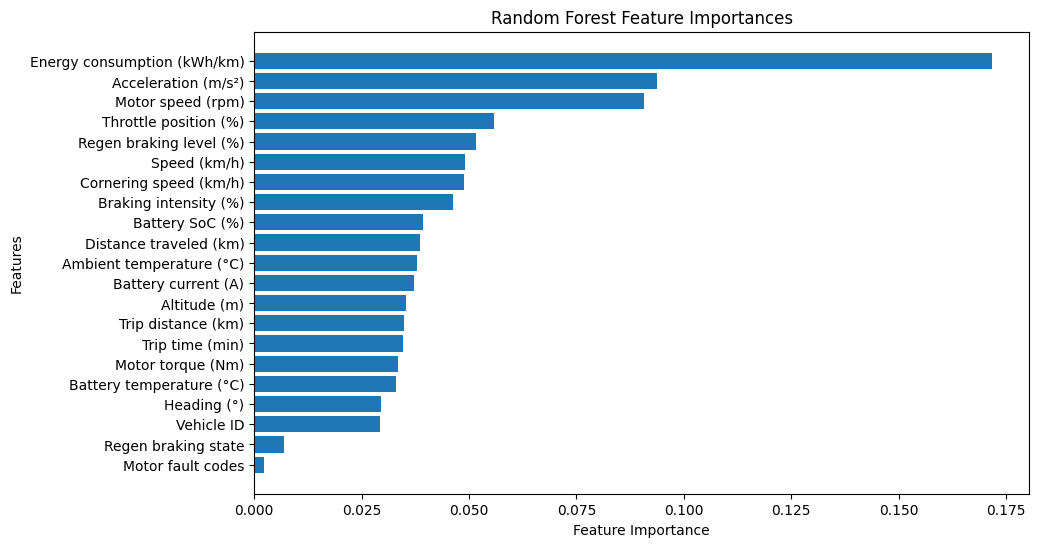

In [22]:
feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()

Model 2: Support Vector Machine (SVM) Classifier

In [23]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine Classifier Accuracy:", svm_accuracy)
print("Support Vector Machine Classifier Report:")
print(classification_report(y_test, svm_pred))

Support Vector Machine Classifier Accuracy: 0.3435
Support Vector Machine Classifier Report:
              precision    recall  f1-score   support

           1       0.51      0.69      0.59       215
           2       0.29      0.28      0.29       179
           3       0.30      0.27      0.28       215
           4       0.30      0.26      0.28       214
           5       0.27      0.26      0.26       194
           6       0.28      0.24      0.26       198
           7       0.27      0.29      0.28       200
           8       0.25      0.24      0.25       211
           9       0.27      0.25      0.26       177
          10       0.58      0.62      0.60       197

    accuracy                           0.34      2000
   macro avg       0.33      0.34      0.33      2000
weighted avg       0.33      0.34      0.34      2000



Model 3: Gradient Boosting Classifier

In [24]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test-1, gb_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Classifier Accuracy: 0.1525
Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           1       0.76      0.69      0.72       215
           2       0.57      0.55      0.56       179
           3       0.59      0.56      0.58       215
           4       0.52      0.53      0.52       214
           5       0.47      0.60      0.53       194
           6       0.57      0.50      0.53       198
           7       0.46      0.56      0.51       200
           8       0.56      0.58      0.57       211
           9       0.52      0.48      0.50       177
          10       0.81      0.66      0.73       197

    accuracy                           0.57      2000
   macro avg       0.58      0.57      0.58      2000
weighted avg       0.58      0.57      0.58      2000



Training using Neural Network

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train 
model.fit(X_train_scaled, y_train-1, epochs=50, batch_size=32, verbose=1)

y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
accuracy = accuracy_score(y_test-1, y_pred)
print("Neural Network Accuracy:", accuracy)



Epoch 1/50


250/250 [==============================] - 2s 3ms/step - loss: 1.6507 - accuracy: 0.3204
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 1.3381 - accuracy: 0.4080
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2923 - accuracy: 0.4200
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2702 - accuracy: 0.4334
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2557 - accuracy: 0.4490
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2421 - accuracy: 0.4510
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2285 - accuracy: 0.4599
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2209 - accuracy: 0.4700
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 1.2137 - accuracy: 0.4703
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 1.1962 - accuracy: 0.

Saving the Randomforest Model

In [27]:
import joblib


joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

Load the Model

In [28]:
loaded_model = joblib.load('random_forest_model.pkl')

Make Prediction From any Column from X_test

In [29]:
row_to_predict = X_test.iloc[1]

# Reshape the row to a 2D array
custom_data = row_to_predict.values.reshape(1, -1)
custom_data

array([[ 1.20000000e+01,  8.90000000e+01,  5.03739253e+00,
         4.80000000e+01,  2.00000000e+01,  7.10000000e+01,
        -6.01572917e+00,  8.00000000e+01,  2.65700000e+03,
         6.80000000e+01,  1.80000000e+01,  3.42923860e-01,
         3.32583005e+01,  1.56000000e+02,  1.72000000e+02,
         5.50000000e+01,  0.00000000e+00,  2.72362089e+01,
         1.81574726e+01,  2.58172736e+01,  0.00000000e+00]])

In [30]:
predicted_class = loaded_model.predict(custom_data)
predicted_class

array([6], dtype=int64)

In [31]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [32]:
print("Predicted Driver Behaviour rating is:", predicted_class[0])

Predicted Driver Behaviour rating is: 6


Making Prediction From Custom Data

In [33]:
import numpy as np

custom_variable = np.array([[13, 35, 0.9, 69, 14, 61, -8, 41, 2500, 72, 20, 0.17, 27, 180,175, 60, 0, 20, 60, 22.0, 0]])
predicted_class = loaded_model.predict(custom_variable)
print("Predicted Driver Behaviour rating is:", predicted_class[0])

Predicted Driver Behaviour rating is: 1
